# Improved Integration of GRASS and Jupyter

As part of Google Summer of Code 2021, we've been working to shorten and simplify the launch of GRASS in Jupyter and imporve the map displays. You can find out more about the project and follow the progress on the [GRASS wiki page](https://trac.osgeo.org/grass/wiki/GSoC/2021/JupyterAndGRASS).

This notebook is designed to run in binder and demonstrate the usage of `grass.jupyter`, the new module of Jupyter-specific functions for GRASS.

In [1]:
import os
import subprocess
import sys

In [2]:
gisbase = subprocess.check_output(["grass", "--config", "path"], text=True).strip()
os.environ["GISBASE"] = gisbase
sys.path.append(os.path.join(gisbase, "etc", "python"))

In [3]:
import grass.script as gs
import grass.jupyter as gj

In [4]:
# Let's check our import by printing docstring for init()
gj.init?

Signature: gj.init(path, location, mapset)
Docstring:
This function initiates a GRASS session and sets GRASS
environment variables.

Inputs:
    path - path to grass databases
    location - name of GRASS location
    mapset - name of mapset within location
File:      /usr/local/grass80/etc/python/grass/jupyter/setup.py
Type:      function


In [5]:
# Start GRASS Session
gj.init("../../data/grassdata", "nc_basic_spm_grass7", "user1")

In [6]:
# Set computational region to the study area.
gs.run_command("g.region", raster="elevation")

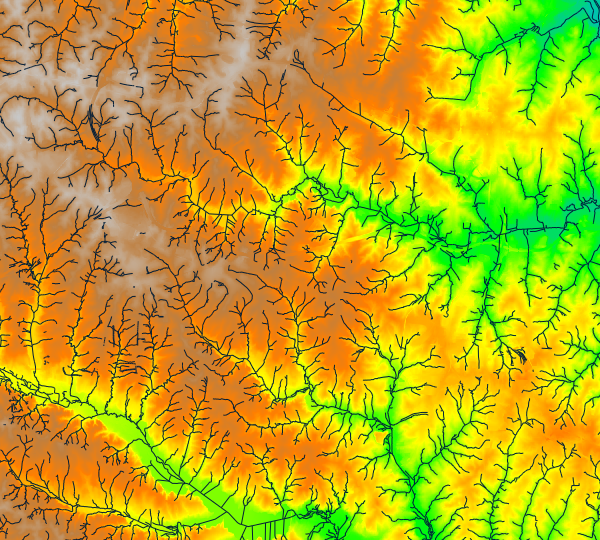

In [7]:
# Demonstration of GrassRenderer for non-interactive map display
m = gj.GrassRenderer(height=540, filename = "streams_map.png")

m.run("d.rast", map="elevation")
m.run("d.vect", map="streams")

m.show()

### Let's demonstrate how we can have two instances of GrassRenderer

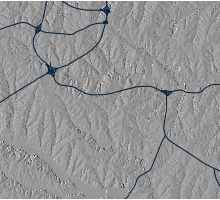

In [13]:
# First, we'll make a second instance. Notice we need a different filename
m2 = gj.GrassRenderer(height=200, width = 220, filename = "roads_maps.png")

m2.run("d.rast", map="elevation_shade")
m2.run("d.vect", map="roadsmajor")

m2.show()

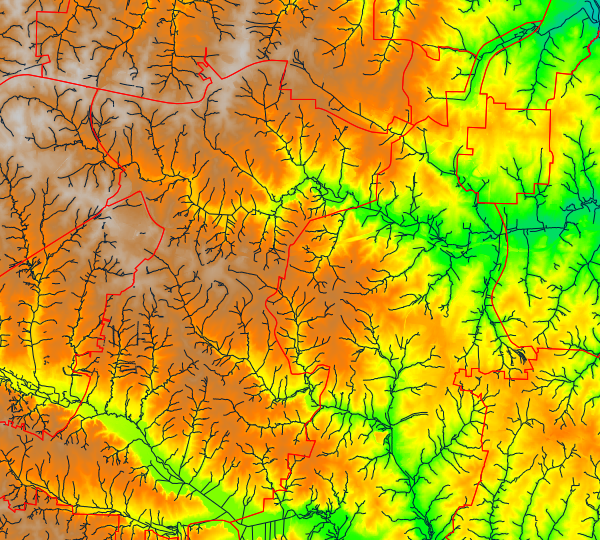

In [9]:
# Then, we return to the first instance and continue to modify/display

m.run("d.vect", map = "zipcodes", color="red", fill_color="none")

m.show()

### Error Handling

In [10]:
# If we pass a non-display related module to GrassRenderer, it returns an error

m.run("r.watershed", map="elevation")

Module must be from GRASS display library. It must begin with letter 'd'.
